In [97]:
using CSV, Plots, DataFrames, Flux, Statistics

In [98]:
data=CSV.read("/Users/seansantellanes/Downloads/EUG.csv",DataFrame)

Row,DateTime,Temperature,Dew Point,Relative Humidity,Wind Speed,Direction
,String31,Float64,Float64,Float64,Int64,Int64
1,2024-06-23 15:50:00,75.2,51.78,44.05,0,0
2,2024-06-23 15:55:00,75.2,51.78,44.05,7,10
3,2024-06-23 16:05:00,75.2,49.98,41.21,7,40
4,2024-06-23 16:15:00,75.2,49.98,41.21,6,260
5,2024-06-23 16:25:00,75.2,51.78,44.05,12,10
6,2024-06-23 16:35:00,75.2,49.98,41.21,9,320
7,2024-06-23 16:45:00,75.2,49.98,41.21,0,0
8,2024-06-23 16:54:00,75.02,51.04,43.15,9,360
9,2024-06-23 17:00:00,77.0,51.78,41.49,9,350


In [99]:
using LsqFit
for i in 2:4
    sine_model(t, p) = p[1] * sin.(2 * pi * t / 24 .+ p[2]) .+ p[3]
    p0 = [1.0, 0.0, 0.0]
    sine_model(data[:,i],p0)
    t=1:size(data,1)
    fit = curve_fit(sine_model, t, data[:,i], p0)
    data[:,i] = data[:,i] .- sine_model(t, fit.param)
end

In [100]:
function normalize(df::DataFrame)
    for i in 1:size(df,2)
        df[:,i]=(df[:,i].-mean(df[:,i]))./std(df[:,i])
    end
    return df
end

data=data[:,Not(1)]
data2=Float32.(data)


Row,Temperature,Dew Point,Relative Humidity,Wind Speed,Direction
,Float32,Float32,Float32,Float32,Float32
1,9.70672,0.537579,-19.1968,0.0,0.0
2,9.77673,0.520733,-19.3236,7.0,10.0
3,9.85531,-1.29775,-22.3153,7.0,40.0
4,9.93708,-1.3166,-22.4816,6.0,260.0
5,10.0165,0.465467,-19.8112,12.0,10.0
6,10.0881,-1.35034,-22.8126,9.0,320.0
7,10.1471,-1.36293,-22.9547,0.0,0.0
8,10.0094,-0.311447,-21.1278,9.0,360.0
9,12.0121,0.424682,-22.8643,9.0,350.0


In [101]:
data2=normalize(data2)

Row,Temperature,Dew Point,Relative Humidity,Wind Speed,Direction
,Float32,Float32,Float32,Float32,Float32
1,0.975641,0.181614,-1.07601,-1.4887,-1.51362
2,0.982679,0.175923,-1.08312,0.263088,-1.43397
3,0.990576,-0.438427,-1.25081,0.263088,-1.19502
4,0.998796,-0.444795,-1.26013,0.0128336,0.557301
5,1.00678,0.157252,-1.11045,1.51436,-1.43397
6,1.01398,-0.456194,-1.27869,0.763598,1.03521
7,1.0199,-0.460447,-1.28665,-1.4887,-1.51362
8,1.00606,-0.105218,-1.18425,0.763598,1.35381
9,1.20736,0.143474,-1.28158,0.763598,1.27416


In [102]:
data2=Matrix(data2)
X=[]

Any[]

In [103]:
function create_sequences(data, seq_length)
    X = []
    y = []
    for i in 1:(size(data, 1) - seq_length)
        push!(X, data[i:(i + seq_length - 1), :])
        push!(y, data[i + seq_length, :])
    end
    return hcat(X...), hcat(y...)
end

seq_length = 12  # Adjust based on your dataset
X, y = create_sequences(data2, seq_length)


(Float32[0.97564125 0.18161435 … 0.012833556 -0.876416; 0.9826787 0.17592293 … -1.4886961 -1.5136237; … ; 1.0246272 0.14581522 … 0.7635984 1.1148582; 1.0206577 0.14930482 … 0.51334345 0.79625434], Float32[1.0149599 1.0079225 … 1.5087386 1.6936299; -0.4540498 -0.44835833 … 0.81823367 0.8181225; … ; 0.7635984 1.5143632 … 0.51334345 0.2630885; 1.0352073 1.1148582 … 0.79625434 1.0352073])

In [104]:
X = Flux.unsqueeze(X, 1)
y = Flux.unsqueeze(y, 1)

1×5×924 Array{Float32, 3}:
[:, :, 1] =
 1.01496  -0.45405  -1.29047  0.763598  1.03521

[:, :, 2] =
 1.00792  -0.448358  -1.28337  1.51436  1.11486

[:, :, 3] =
 1.00002  -0.442116  -1.27487  1.51436  1.11486

;;; … 

[:, :, 922] =
 1.50677  0.820223  -1.32847  0.763598  1.11486

[:, :, 923] =
 1.50874  0.818234  -1.32901  0.513343  0.796254

[:, :, 924] =
 1.69363  0.818123  -1.45699  0.263088  1.03521

In [105]:
size(y,3)

924

In [106]:
η=50
model = Chain(
    LSTM(size(X, 2), η),  # Input size to LSTM, number of hidden units
    Dense(η, η),

    Dense(η, size(y, 2))
)

Chain(
  Recur(
    LSTMCell(12 => 50),                 # 12_700 parameters
  ),
  Dense(50 => 50),                      # 2_550 parameters
  Dense(50 => 5),                       # 255 parameters
)         # Total: 9 trainable arrays, 15_505 parameters,
          # plus 2 non-trainable, 100 parameters, summarysize 61.152 KiB.

In [107]:
x=X[:,:,1]

1×12 Matrix{Float32}:
 0.975641  0.982679  0.990576  0.998796  …  1.20736  1.0266  1.02463  1.02066

In [108]:
target=y[:,:,1]

1×5 Matrix{Float32}:
 1.01496  -0.45405  -1.29047  0.763598  1.03521

In [109]:
model(x')'-target

1×5 Matrix{Float32}:
 -1.04697  0.356467  1.31564  -0.893395  -1.13855

In [110]:
loss(x, y) = Flux.mse(model(x')', y)
opt = ADAM(0.01)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [111]:
function train!(epochs)
    for epoch in 1:epochs
        for i in 1:size(X, 2)
            x = X[:, :, i]
            target = y[:, :,i]
            gs = Flux.gradient(()->loss(x, target), Flux.params(model))
            Flux.Optimise.update!(opt, Flux.params(model), gs)
        end
        println("Epoch $epoch completed")
    end
end

train!(1000)  # Train for 100 epochs


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed
Epoch 16 completed
Epoch 17 completed
Epoch 18 completed
Epoch 19 completed
Epoch 20 completed
Epoch 21 completed
Epoch 22 completed
Epoch 23 completed
Epoch 24 completed
Epoch 25 completed
Epoch 26 completed
Epoch 27 completed
Epoch 28 completed
Epoch 29 completed
Epoch 30 completed
Epoch 31 completed
Epoch 32 completed
Epoch 33 completed
Epoch 34 completed
Epoch 35 completed
Epoch 36 completed
Epoch 37 completed
Epoch 38 completed
Epoch 39 completed
Epoch 40 completed
Epoch 41 completed
Epoch 42 completed
Epoch 43 completed
Epoch 44 completed
Epoch 45 completed
Epoch 46 completed
Epoch 47 completed
Epoch 48 completed
Epoch 49 completed
Epoch 50 completed
Epoch 51 completed
Epoch 52 completed
Epoch 53 completed
Ep

In [112]:
size(X,2)

12

In [113]:
model(X[:,:,1]')

5×1 Matrix{Float32}:
  0.9899578
 -0.35676312
 -1.261173
  0.65643036
  1.0027351

In [114]:
predictions = []
for i in size(X, 3)-seq_length+1:1:size(X,3)
    push!(predictions, model(X[:, :,i]')')
end



In [115]:
predictions

12-element Vector{Any}:
 Float32[1.0464935 -0.3678541 … 1.5604225 1.0576501]
 Float32[0.8808476 -0.41262645 … 1.473472 1.029094]
 Float32[0.9098433 -0.38176495 … 1.0254141 0.99126804]
 Float32[0.9237838 -0.37937295 … 0.78586864 0.9969703]
 Float32[0.72818303 -0.41284955 … 2.5734444 1.0084867]
 Float32[0.79245615 -0.40823472 … 1.9593234 1.0043652]
 Float32[0.78911966 -0.40718383 … 1.6565531 1.0361795]
 Float32[0.9217055 -0.37462926 … 1.4786901 1.0328205]
 Float32[0.9594221 -0.37510288 … 1.1810216 1.0312765]
 Float32[0.7557974 -0.40762106 … 2.5502467 1.018207]
 Float32[0.78029335 -0.34879965 … 2.131041 0.99569696]
 Float32[0.68501866 -0.26755834 … 1.80745 0.9721389]

In [116]:
predictions=vcat(predictions...)

12×5 Matrix{Float32}:
 1.04649   -0.367854  -1.28812   1.56042   1.05765
 0.880848  -0.412626  -1.18276   1.47347   1.02909
 0.909843  -0.381765  -1.21111   1.02541   0.991268
 0.923784  -0.379373  -1.24907   0.785869  0.99697
 0.728183  -0.41285   -0.996073  2.57344   1.00849
 0.792456  -0.408235  -1.09661   1.95932   1.00437
 0.78912   -0.407184  -1.09244   1.65655   1.03618
 0.921705  -0.374629  -1.22546   1.47869   1.03282
 0.959422  -0.375103  -1.27572   1.18102   1.03128
 0.755797  -0.407621  -1.02326   2.55025   1.01821
 0.780293  -0.3488    -1.06814   2.13104   0.995697
 0.685019  -0.267558  -0.985472  1.80745   0.972139

In [117]:
data2=vcat(data2,predictions)

948×5 Matrix{Float32}:
 0.975641   0.181614  -1.07601   -1.4887     -1.51362
 0.982679   0.175923  -1.08312    0.263088   -1.43397
 0.990576  -0.438427  -1.25081    0.263088   -1.19502
 0.998796  -0.444795  -1.26013    0.0128336   0.557301
 1.00678    0.157252  -1.11045    1.51436    -1.43397
 1.01398   -0.456194  -1.27869    0.763598    1.03521
 1.0199    -0.460447  -1.28665   -1.4887     -1.51362
 1.00606   -0.105218  -1.18425    0.763598    1.35381
 1.20736    0.143474  -1.28158    0.763598    1.27416
 1.0266     0.143826  -1.14003    0.263088    1.19451
 ⋮                                           
 0.923784  -0.379373  -1.24907    0.785869    0.99697
 0.728183  -0.41285   -0.996073   2.57344     1.00849
 0.792456  -0.408235  -1.09661    1.95932     1.00437
 0.78912   -0.407184  -1.09244    1.65655     1.03618
 0.921705  -0.374629  -1.22546    1.47869     1.03282
 0.959422  -0.375103  -1.27572    1.18102     1.03128
 0.755797  -0.407621  -1.02326    2.55025     1.01821
 0.780293  -

In [118]:
t=collect(size(data,1)+1:1:size(data,1)+6)

6-element Vector{Int64}:
 937
 938
 939
 940
 941
 942

In [119]:
data_red=CSV.read("/Users/seansantellanes/Downloads/EUG.csv",DataFrame)
i=2
sine_model(t, p) = p[1] * sin.(2 * pi * t / 24 .+ p[2]) .+ p[3]
p0 = [1.0, 0.0, 0.0]
sine_model(data_red[:,i],p0)
t=1:size(data_red,1)
fit = curve_fit(sine_model, t, data_red[:,i], p0)
m=sine_model(1:size(data_red,1)+seq_length, fit.param)


948-element Vector{Float64}:
 65.49328429902805
 65.42326834147407
 65.34469458474209
 65.26291770050409
 65.18351064827822
 65.1118848874473
 65.0529215952448
 65.01063902259287
 64.98791865694248
 64.98630885366552
  ⋮
 65.2629177005041
 65.18351064827822
 65.1118848874473
 65.0529215952448
 65.01063902259287
 64.98791865694248
 64.98630885366552
 65.00591931819501
 65.04541362978108

In [120]:
data2[:,1]=(data2[:,1].*std(data[:,1])).+mean(data[:,1]).+m

948-element Vector{Float64}:
 75.19999943017177
 75.19999960531835
 75.1999997128761
 75.19999954153938
 75.19999894005957
 75.19999933488428
 75.19999905646539
 75.01999933060998
 76.99999926849117
 75.19999916149492
  ⋮
 74.45369964142284
 72.42824865174558
 72.99608012590609
 72.90392189633494
 74.18074388049232
 74.53326857027784
 72.50578378343114
 72.76910606156524
 71.86070662273062

In [121]:
data_t=CSV.read("/Users/seansantellanes/Downloads/EUG.csv",DataFrame)
using Dates
typeof(data_t."DateTime")
format = "yyyy-mm-dd HH:MM:SS"
dt=DateTime.(data_t."DateTime",format);

In [122]:
last_dt=dt[end]
for i in 1:seq_length
    last_dt+=Minute(5)
    push!(dt,last_dt)
end

In [123]:
size(data_t,1)

936

In [124]:
dt[size(data_t,1)+1:end]

12-element Vector{DateTime}:
 2024-06-30T15:40:00
 2024-06-30T15:45:00
 2024-06-30T15:50:00
 2024-06-30T15:55:00
 2024-06-30T16:00:00
 2024-06-30T16:05:00
 2024-06-30T16:10:00
 2024-06-30T16:15:00
 2024-06-30T16:20:00
 2024-06-30T16:25:00
 2024-06-30T16:30:00
 2024-06-30T16:35:00

In [125]:
data2[size(data_t,1):end,1]

13-element Vector{Float32}:
 82.4
 75.904915
 74.186874
 74.39678
 74.4537
 72.428246
 72.99608
 72.90392
 74.18074
 74.53327
 72.50578
 72.769104
 71.86071

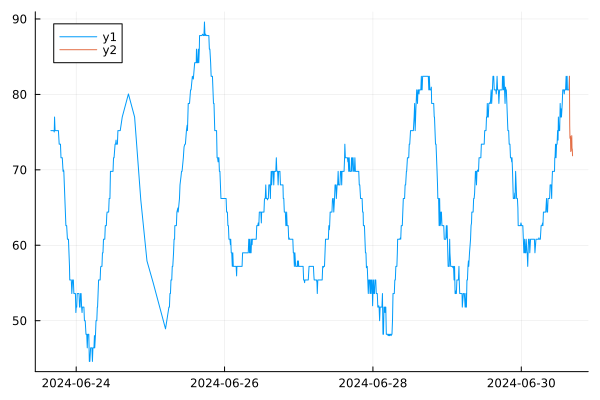

In [126]:
plot1 = plot(dt[1:size(data_t,1)],data2[1:size(data_t,1), 1])
plot!(dt[size(data_t,1):end],data2[size(data_t,1):end,1])


In [127]:
@show data2[size(data_t,1):end,1]
@show dt[end]

data2[size(data_t, 1):end, 1] = Float32[82.4, 75.904915, 74.186874, 74.39678, 74.4537, 72.428246, 72.99608, 72.90392, 74.18074, 74.53327, 72.50578, 72.769104, 71.86071]
dt[end] = DateTime("2024-06-30T16:35:00")


2024-06-30T16:35:00